## Hoang Khang Pham - 126459239
## Minh Tan To

# Import Libraries

In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Prepare dataset

## Import dataset


In [52]:
df = pd.read_csv("CC GENERAL.csv", nrows=5000)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,C15136,4274.488095,1.000000,0.00,0.00,0.00,12527.491290,0.000000,0.000000,0.000000,0.583333,17,0,10500.0,9836.835644,1115.092967,0.083333,12
4996,C15137,900.557796,1.000000,1865.55,1865.55,0.00,583.318150,0.583333,0.583333,0.000000,0.250000,7,20,3000.0,676.956491,232.309851,0.090909,12
4997,C15138,858.857651,1.000000,1013.61,631.13,382.48,0.000000,0.500000,0.250000,0.416667,0.000000,0,13,2500.0,739.761292,257.745004,0.000000,12
4998,C15139,6537.852206,0.909091,2598.51,2422.55,175.96,0.000000,0.272727,0.090909,0.272727,0.000000,0,26,16000.0,2209.410409,1385.561503,0.000000,11


In [53]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           5000 non-null   object 
 1   BALANCE                           5000 non-null   float64
 2   BALANCE_FREQUENCY                 5000 non-null   float64
 3   PURCHASES                         5000 non-null   float64
 4   ONEOFF_PURCHASES                  5000 non-null   float64
 5   INSTALLMENTS_PURCHASES            5000 non-null   float64
 6   CASH_ADVANCE                      5000 non-null   float64
 7   PURCHASES_FREQUENCY               5000 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        5000 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  5000 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            5000 non-null   float64
 11  CASH_ADVANCE_TRX                  5000 non-null   int64  
 12  PURCHA

## Handle missing values

In [54]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    160
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [55]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df.drop('CUST_ID', axis=1, inplace=True)

/var/folders/7x/1c_g2v5s46gd3rpq1b_zrd1r0000gn/T/ipykernel_98841/3618717446.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)


### Standardization (mean=0, std=1)

In [56]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_scaled.shape)
print(df_scaled.head())

(5000, 17)
    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.805266          -0.361837  -0.435246         -0.377964   
1  0.538978           0.055239  -0.472559         -0.377964   
2  0.238238           0.472316  -0.170156          0.012024   
3 -0.114016          -1.195991   0.113732          0.378133   
4 -0.474978           0.472316  -0.466301         -0.369893   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.354084     -0.477760            -0.814821   
1               -0.447004      2.304358            -1.228523   
2               -0.447004     -0.477760             1.253688   
3               -0.447004     -0.388899            -1.021673   
4               -0.447004     -0.477760            -1.021673   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.752254                         -0.680295   
1                   -0.752254                         -0.890692   
2                    2.3

## Frame the Problem & Train/Test Split
- Define your unsupervised objective (e.g., customer segments, usage patterns).
    - identify customer segments based on their credit card usage patterns — such as spending habits, cash advances, payments, and credit limits.
- Identify features (no explicit target).
- Create three splits: train_size = {0.10, 0.25, 0.30}.
- Keep the test set unseen until final evaluation

In [57]:
X = df_scaled
train_size = {0.10, 0.25, 0.30}
for size in train_size:
    X_train, X_test = train_test_split(X, test_size=size, random_state=42)
    print(f"Train size: {X_train.shape}, Test size: {X_test.shape} for test_size={size}")




Train size: (4500, 17), Test size: (500, 17) for test_size=0.1
Train size: (3750, 17), Test size: (1250, 17) for test_size=0.25
Train size: (3500, 17), Test size: (1500, 17) for test_size=0.3


## EDA (Exploratory Data Analysis)
- head(), info(), shape, missing counts.
- Histograms & boxplots for distribution.
- Correlation heatmap to spot redundant features.

In [58]:
print(df_scaled.head())
print(df_scaled.info())
print(df_scaled.shape)
print(df_scaled.isnull().sum())

    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.805266          -0.361837  -0.435246         -0.377964   
1  0.538978           0.055239  -0.472559         -0.377964   
2  0.238238           0.472316  -0.170156          0.012024   
3 -0.114016          -1.195991   0.113732          0.378133   
4 -0.474978           0.472316  -0.466301         -0.369893   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.354084     -0.477760            -0.814821   
1               -0.447004      2.304358            -1.228523   
2               -0.447004     -0.477760             1.253688   
3               -0.447004     -0.388899            -1.021673   
4               -0.447004     -0.477760            -1.021673   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.752254                         -0.680295   
1                   -0.752254                         -0.890692   
2                    2.354873      

# Histograms & Boxplots

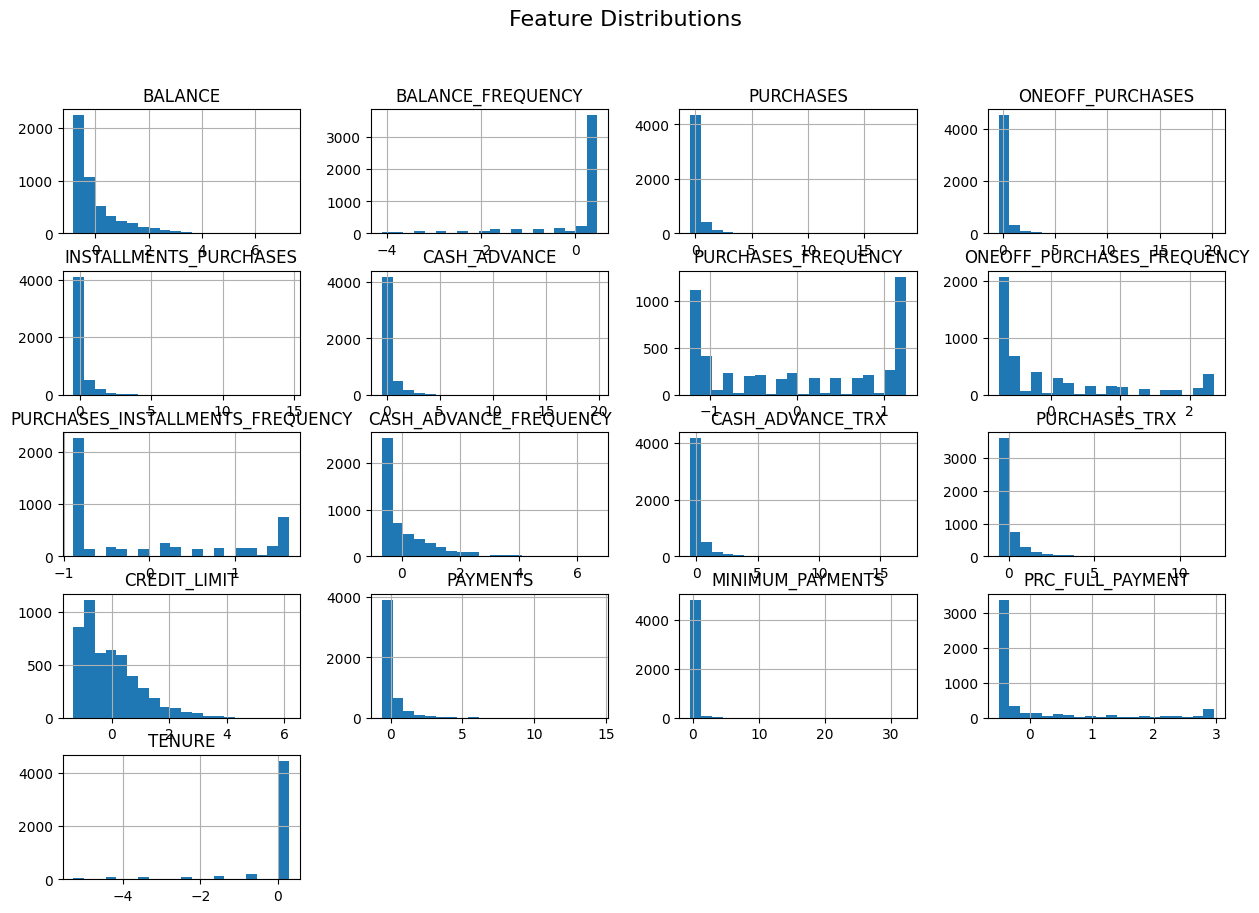

In [59]:

df_scaled.hist(figsize=(15, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


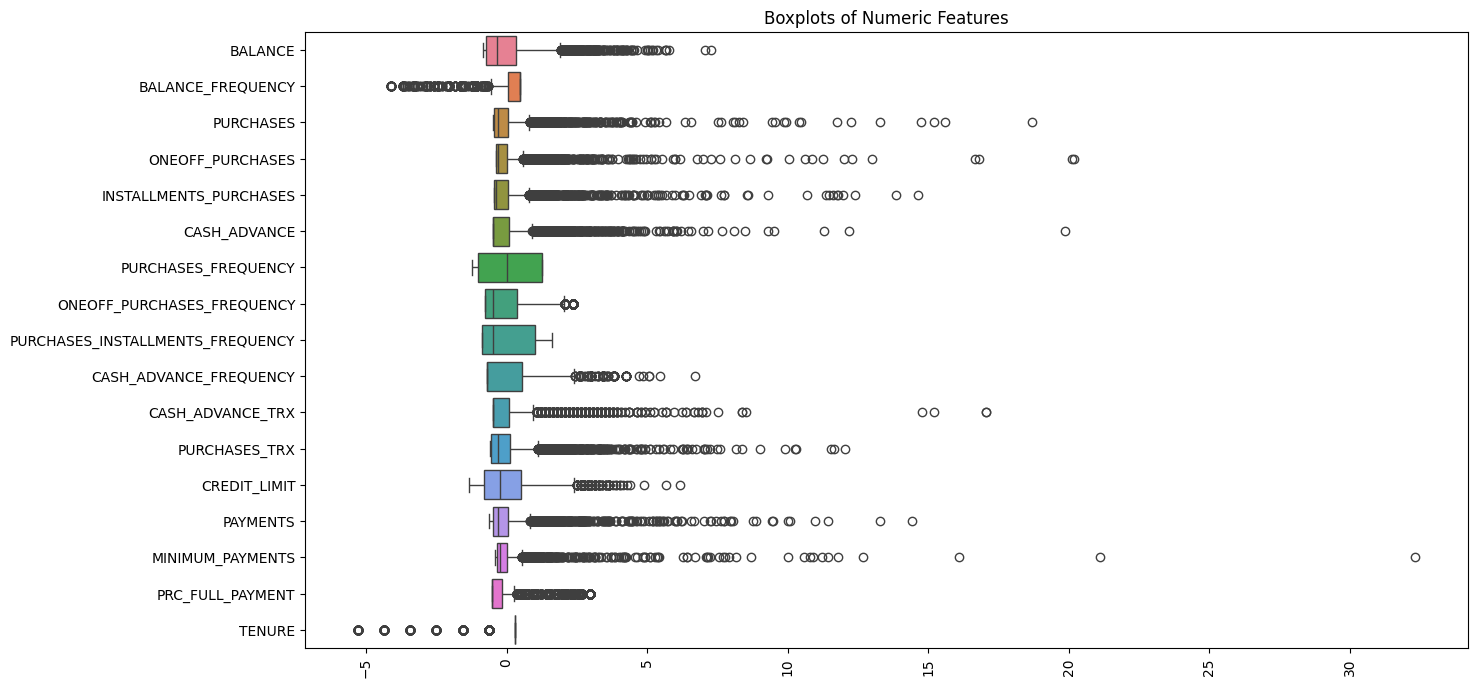

In [67]:

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_scaled, orient="h")
plt.xticks(rotation=90)
plt.title("Boxplots of Numeric Features")
plt.show()


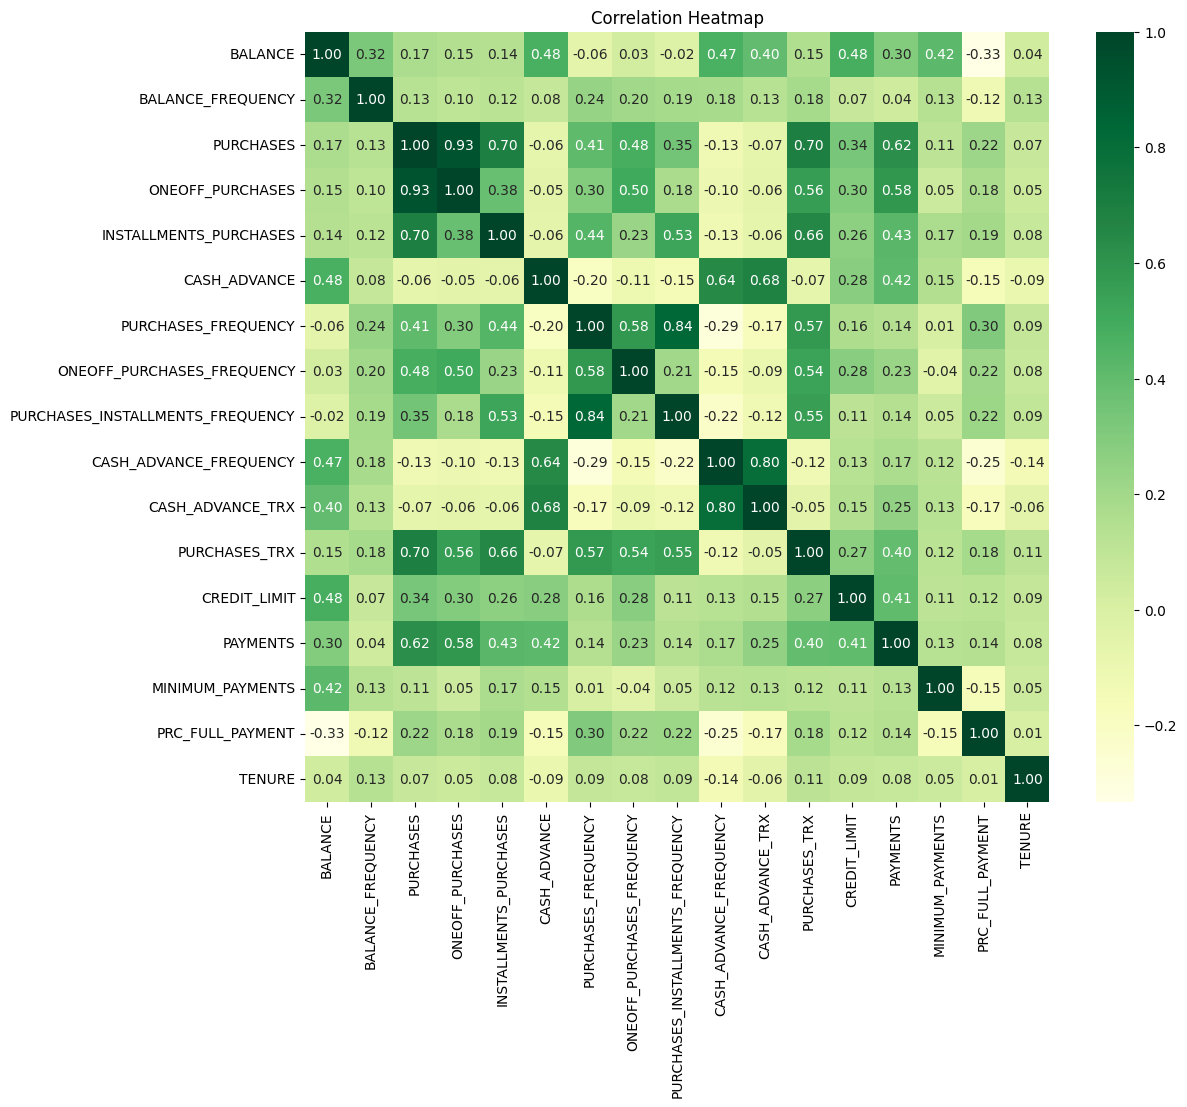

In [73]:
plt.figure(figsize =(12,10))
sns.heatmap(df_scaled.corr(), annot = True, cmap ="YlGn", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()